# Titanic Survival Project

### Probelem statement : Use machine learning to create a model that predicts which passengers survived the titanic shipwreck


### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading csv file from a local disk

In [2]:
train= pd.read_csv("C:\\Users\\Larry Williams\\Desktop\\Mamata\\Edvancer\\data\\data\\titanic\\train.csv")
test= pd.read_csv("C:\\Users\\Larry Williams\\Desktop\\Mamata\\Edvancer\\data\\data\\titanic\\test.csv")

### Concating the train and test datasets

In [3]:
test["Survived"]=np.nan
train["data"]="train"
test["data"]="test"
data=pd.concat([train,test],axis=0)

### Removing the unwanted columns

In [4]:
del data['PassengerId'],data['Name'],data['Ticket'],data["Cabin"]

### Exploratory Data Analysis

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

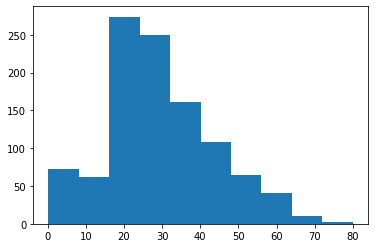

In [5]:
plt.hist(data["Age"])

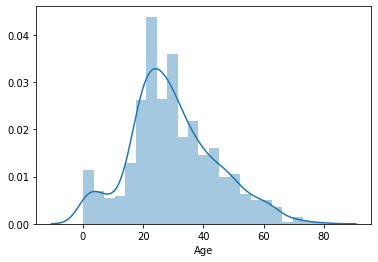

In [6]:
sns.distplot(data["Age"])

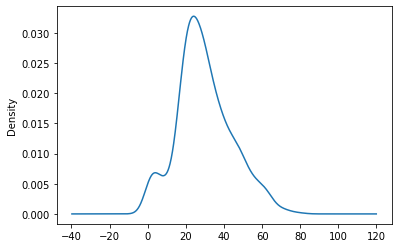

In [7]:
pd.Series(data["Age"]).plot(kind="density")

(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

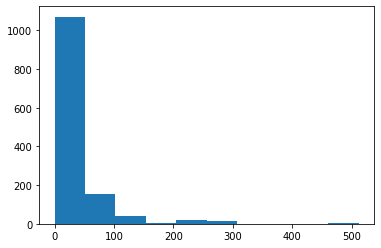

In [8]:
plt.hist(data["Fare"])

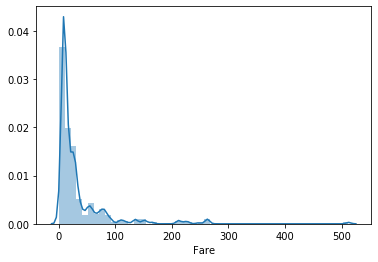

In [9]:
sns.distplot(data["Fare"])

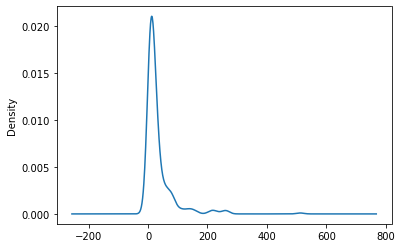

In [10]:
pd.Series(data["Fare"]).plot(kind="density")

In [11]:
c=data["Pclass"].value_counts()
c

3    709
1    323
2    277
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

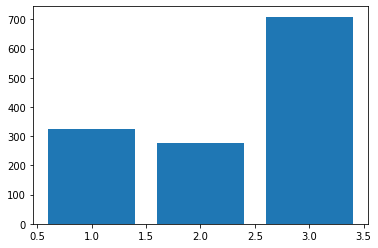

In [12]:
plt.bar(c.index,c.values)

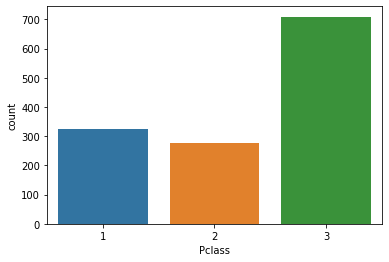

In [13]:
sns.countplot(data["Pclass"])

In [14]:
k=data["SibSp"].value_counts()
k

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

<BarContainer object of 7 artists>

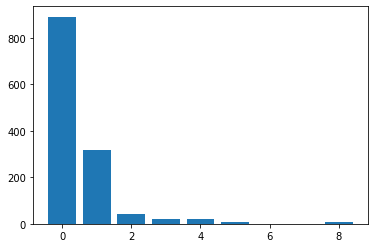

In [15]:
plt.bar(k.index,k.values)

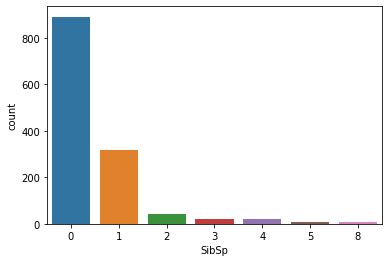

In [16]:
sns.countplot(data["SibSp"])

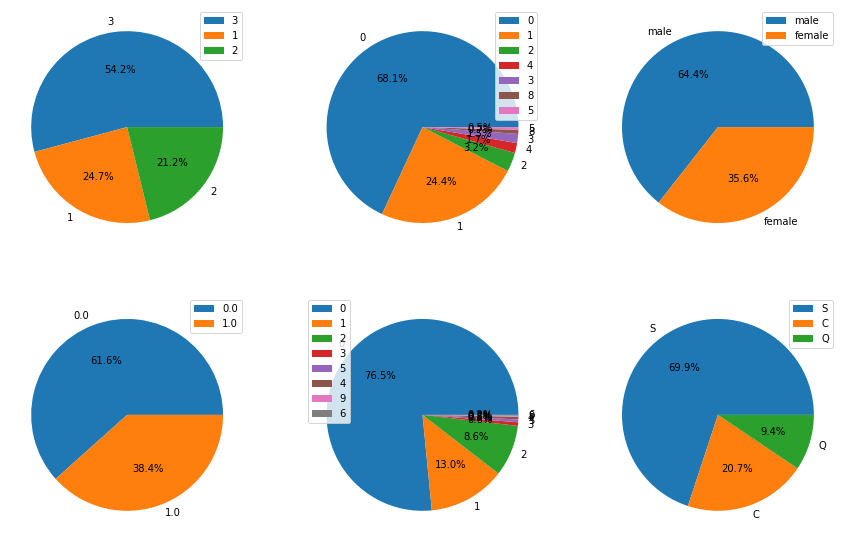

In [17]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
a=data["Pclass"].value_counts().values
b=data["Pclass"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,2)
a=data["SibSp"].value_counts().values
b=data["SibSp"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,3)
a=data["Sex"].value_counts().values
b=data["Sex"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,4)
a=data["Survived"].value_counts().values
b=data["Survived"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,5)
a=data["Parch"].value_counts().values
b=data["Parch"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

plt.subplot(3,3,6)
a=data["Embarked"].value_counts().values
b=data["Embarked"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")
plt.legend()

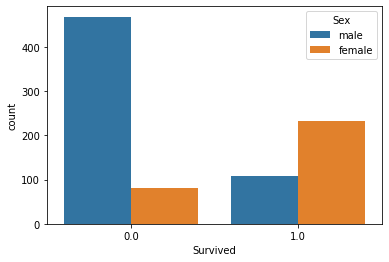

In [18]:
sns.countplot(x="Survived",hue="Sex",data=data)

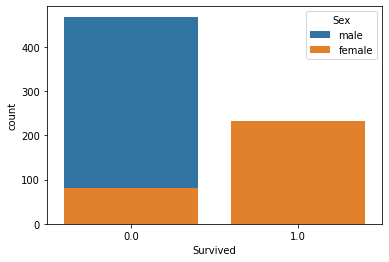

In [19]:
sns.countplot(x="Survived",hue="Sex",data=data,dodge=False)

Text(0, 0.5, 'COUNT')

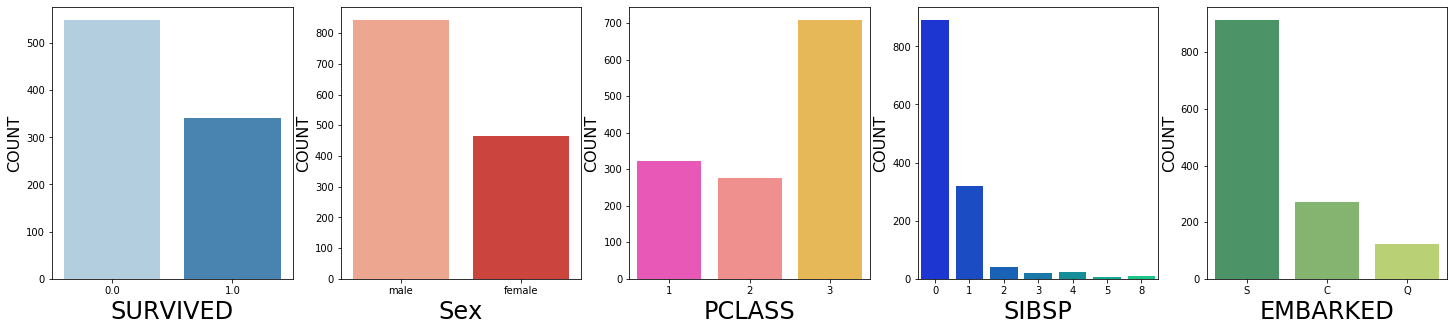

In [20]:
fig,ax=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(data["Survived"],ax=ax[0],palette="Blues")
ax[0].set_xlabel("SURVIVED",fontsize=24)
ax[0].set_ylabel("COUNT",fontsize=16)

sns.countplot(data["Sex"],ax=ax[1],palette="Reds")
ax[1].set_xlabel("Sex",fontsize=24)
ax[1].set_ylabel("COUNT",fontsize=16)

sns.countplot(data["Pclass"],ax=ax[2],palette="spring")
ax[2].set_xlabel("PCLASS",fontsize=24)
ax[2].set_ylabel("COUNT",fontsize=16)

sns.countplot(data["SibSp"],ax=ax[3],palette="winter")
ax[3].set_xlabel("SIBSP",fontsize=24)
ax[3].set_ylabel("COUNT",fontsize=16)

sns.countplot(data["Embarked"],ax=ax[4],palette="summer")
ax[4].set_xlabel("EMBARKED",fontsize=24)
ax[4].set_ylabel("COUNT",fontsize=16)

### Data Pre-Processing

In [21]:
data["Survived"].fillna(1.0,inplace=True)

In [22]:
data["Survived"]=data["Survived"].astype(int)

In [23]:
data['Age'].fillna(data["Age"].mean(),inplace=True)

In [24]:
data["Fare"].fillna(data["Fare"].mean(),inplace=True)

In [25]:
data["Embarked"].fillna("Q",inplace=True)

In [26]:
data["Sex"]=data["Sex"].map({"male":1,"female":0})
data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2})

### Data modelling

In [27]:
train= data[data["data"]=="train"]
del train["data"]
test=data[data["data"]=="test"]
test.drop(["Survived","data"],axis=1,inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
a,b=train_test_split(data,test_size=0.2,random_state=123)

In [58]:
m=a.drop(["Survived", 'data'],axis=1)
n=a["Survived"]

In [59]:
log=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=10,max_features="auto",random_state=123)
rf=RandomForestClassifier(n_estimators=200,max_depth=8,max_features="sqrt",min_samples_leaf=10,random_state=123)
gb=GradientBoostingClassifier(n_estimators=300,max_depth=12,max_leaf_nodes=10,subsample=0.4,learning_rate=0.01,random_state=123)
ex=ExtraTreesClassifier(n_estimators=200,max_depth=12,max_leaf_nodes=20,random_state=123)
xg=XGBClassifier(n_estimators=300,max_depth=12,learning_rate=0.01,subsample=0.5,random_state=123)
k=KNeighborsClassifier(n_neighbors=6)
s=SVC(kernel="rbf",gamma=0.2,C=0.1,probability=True)

In [60]:
m=pd.get_dummies(m,drop_first=True)

In [61]:
log.fit(m,n)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
dt.fit(m,n)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [63]:
rf.fit(m,n)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [64]:
gb.fit(m,n)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=10,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
ex.fit(m,n)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=12, max_features='auto',
                     max_leaf_nodes=20, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [66]:
xg.fit(m,n)

[18:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [67]:
k.fit(m,n)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [68]:
s.fit(m,n)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [69]:
m

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
264,2,1,30.000000,0,0,12.7375,1
73,1,1,28.500000,0,0,27.7208,1
236,1,1,64.000000,1,0,75.2500,1
406,3,1,51.000000,0,0,7.7500,0
28,1,1,41.000000,0,0,30.5000,0
...,...,...,...,...,...,...,...
347,3,0,38.000000,0,0,7.2292,1
256,3,1,29.881138,0,0,7.7500,2
106,3,0,21.000000,0,0,7.6500,0
150,1,0,23.000000,0,1,83.1583,1


In [73]:
m1=b.drop(["Survived",'data'],axis=1)

In [75]:
pred=log.predict(m1)
pred1=dt.predict(m1)
pred2=rf.predict(m1)
pred3=gb.predict(m1)
pred4=ex.predict(m1)
pred5=xg.predict(m1)
pred6=k.predict(m1)
pred7=s.predict(m1)

### Evaluation metrics

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

Text(0.5, 1, 'DECISION TREE CONFUSION MATRIX')

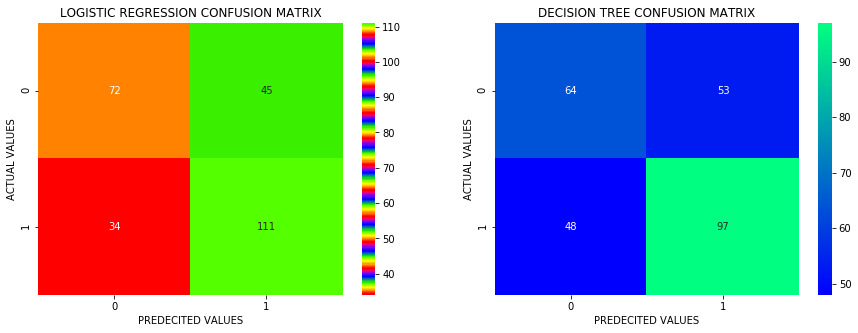

In [77]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred),annot=True,fmt=".0f",ax=axes[0],cmap="prism")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("LOGISTIC REGRESSION CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred1),annot=True,fmt=".0f",ax=axes[1],cmap="winter")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("DECISION TREE CONFUSION MATRIX")

Text(0.5, 1, 'GRADIENT BOOSTING CONFUSION MATRIX')

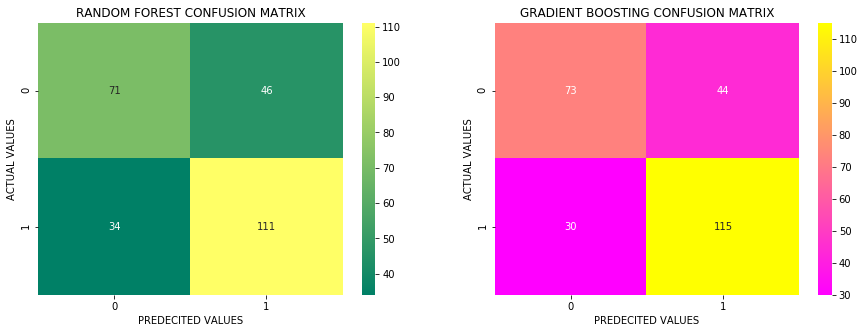

In [78]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred2),annot=True,fmt=".0f",ax=axes[0],cmap="summer")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("RANDOM FOREST CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred3),annot=True,fmt=".0f",ax=axes[1],cmap="spring")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("GRADIENT BOOSTING CONFUSION MATRIX")

Text(0.5, 1, 'XGBOOST CONFUSION MATRIX')

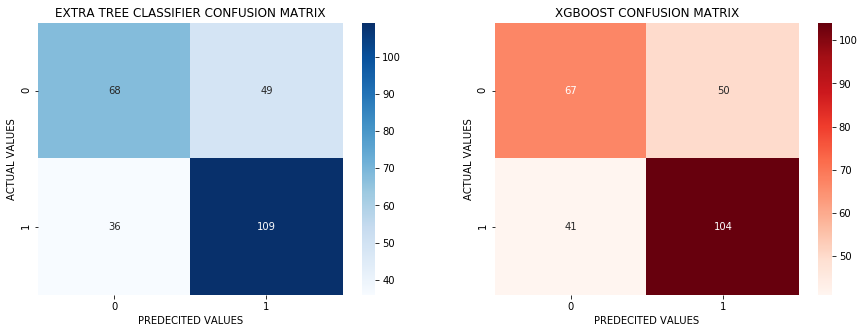

In [79]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred4),annot=True,fmt=".0f",ax=axes[0],cmap="Blues")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("EXTRA TREE CLASSIFIER CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred5),annot=True,fmt=".0f",ax=axes[1],cmap="Reds")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("XGBOOST CONFUSION MATRIX")

Text(0.5, 1, 'SUPPORT VECTOR MACHINE  CONFUSION MATRIX')

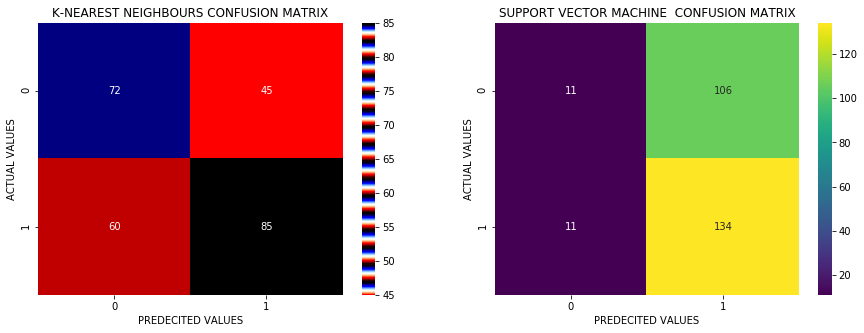

In [80]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(b["Survived"],pred6),annot=True,fmt=".0f",ax=axes[0],cmap="flag")
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("K-NEAREST NEIGHBOURS CONFUSION MATRIX")

sns.heatmap(confusion_matrix(b["Survived"],pred7),annot=True,fmt=".0f",ax=axes[1],cmap="viridis")
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("SUPPORT VECTOR MACHINE  CONFUSION MATRIX")

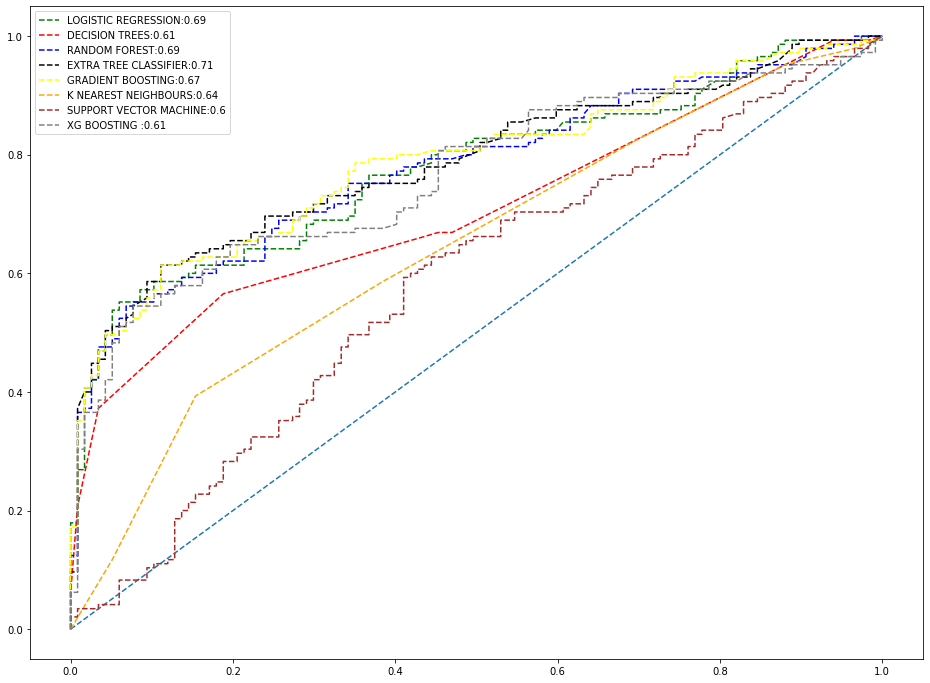

In [81]:
predict1=log.predict_proba(m1) [:,1]
predict2=dt.predict_proba(m1) [:,1]
predict3=rf.predict_proba(m1) [:,1]
predict4=ex.predict_proba(m1) [:,1]
predict5=gb.predict_proba(m1) [:,1]
predict6=k.predict_proba(m1) [:,1]
predict7=s.predict_proba(m1) [:,1]
predict8=xg.predict_proba(m1) [:,1]
fpr,tpr,t=roc_curve(b["Survived"],predict1)
fpr1,tpr1,t1=roc_curve(b["Survived"],predict2)
fpr2,tpr2,t2=roc_curve(b["Survived"],predict3)
fpr3,tpr3,t3=roc_curve(b["Survived"],predict4)
fpr4,tpr4,t4=roc_curve(b["Survived"],predict5)
fpr5,tpr5,t5=roc_curve(b["Survived"],predict6)
fpr6,tpr6,t6=roc_curve(b["Survived"],predict7)
fpr7,tpr7,t7=roc_curve(b["Survived"],predict8)
plt.figure(figsize=(16,12))
plt.plot([0,1],[0,1],"--")
plt.plot(fpr,tpr,"--",color="green",label="LOGISTIC REGRESSION:" +str(round(roc_auc_score(b["Survived"],pred*100),2)))
plt.plot(fpr1,tpr1,"--",color="red",label="DECISION TREES:" +str(round(roc_auc_score(b["Survived"],pred1*100),2)))
plt.plot(fpr2,tpr2,"--",color="blue",label="RANDOM FOREST:" +str(round(roc_auc_score(b["Survived"],pred2*100),2)))
plt.plot(fpr3,tpr3,"--",color="black",label="EXTRA TREE CLASSIFIER:" +str(round(roc_auc_score(b["Survived"],pred3*100),2)))
plt.plot(fpr4,tpr4,"--",color="yellow",label="GRADIENT BOOSTING:" +str(round(roc_auc_score(b["Survived"],pred4*100),2)))
plt.plot(fpr5,tpr5,"--",color="orange",label="K NEAREST NEIGHBOURS:" +str(round(roc_auc_score(b["Survived"],pred5*100),2)))
plt.plot(fpr6,tpr6,"--",color="brown",label="SUPPORT VECTOR MACHINE:" +str(round(roc_auc_score(b["Survived"],pred6*100),2)))
plt.plot(fpr7,tpr7,"--",color="grey",label="XG BOOSTING :" +str(round(roc_auc_score(b["Survived"],pred1*100),2)))
plt.legend()

[Text(273.92727272727274, 570.7800000000001, 'Age <= 6.5\ngini = 0.485\nsamples = 100.0%\nvalue = [0.413, 0.587]'),
 Text(121.74545454545455, 407.70000000000005, 'SibSp <= 2.5\ngini = 0.305\nsamples = 4.6%\nvalue = [0.188, 0.812]'),
 Text(60.872727272727275, 244.62, 'gini = 0.102\nsamples = 3.5%\nvalue = [0.054, 0.946]'),
 Text(182.61818181818182, 244.62, 'gini = 0.463\nsamples = 1.1%\nvalue = [0.636, 0.364]'),
 Text(426.1090909090909, 407.70000000000005, 'Embarked <= 0.5\ngini = 0.488\nsamples = 95.4%\nvalue = [0.423, 0.577]'),
 Text(304.3636363636364, 244.62, 'SibSp <= 3.5\ngini = 0.498\nsamples = 65.9%\nvalue = [0.47, 0.53]'),
 Text(243.4909090909091, 81.53999999999996, '\n  (...)  \n'),
 Text(365.23636363636365, 81.53999999999996, '\n  (...)  \n'),
 Text(547.8545454545455, 244.62, 'Fare <= 50.0\ngini = 0.435\nsamples = 29.5%\nvalue = [0.32, 0.68]'),
 Text(486.9818181818182, 81.53999999999996, '\n  (...)  \n'),
 Text(608.7272727272727, 81.53999999999996, '\n  (...)  \n')]

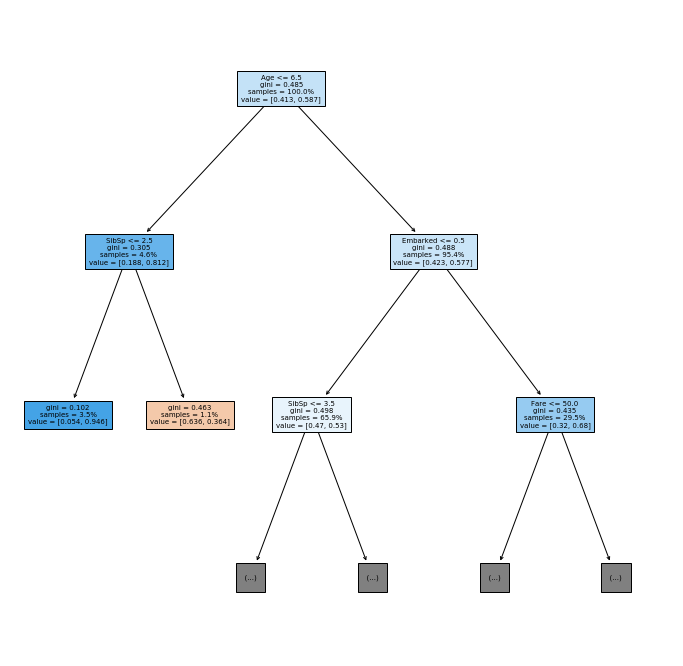

In [83]:
plt.figure(figsize=(12,12))
plot_tree(dt,feature_names=test.columns,filled=True,proportion=True,fontsize=7,max_depth=2)

In [84]:
s=[]
acc=round(accuracy_score(b["Survived"],pred),2)
acc1=round(accuracy_score(b["Survived"],pred1),2)
acc2=round(accuracy_score(b["Survived"],pred2),2)
acc3=round(accuracy_score(b["Survived"],pred3),2)
acc4=round(accuracy_score(b["Survived"],pred4),2)
acc5=round(accuracy_score(b["Survived"],pred5),2)
acc6=round(accuracy_score(b["Survived"],pred6),2)
acc7=round(accuracy_score(b["Survived"],pred7),2)
s.append(acc)
s.append(acc1)
s.append(acc2)
s.append(acc3)
s.append(acc4)
s.append(acc5)
s.append(acc6)
s.append(acc7)

In [85]:
s1=[]
roc=round(roc_auc_score(b["Survived"],pred),2)
roc1=round(roc_auc_score(b["Survived"],pred1),2)
roc2=round(roc_auc_score(b["Survived"],pred2),2)
roc3=round(roc_auc_score(b["Survived"],pred3),2)
roc4=round(roc_auc_score(b["Survived"],pred4),2)
roc5=round(roc_auc_score(b["Survived"],pred5),2)
roc6=round(roc_auc_score(b["Survived"],pred6),2)
roc7=round(roc_auc_score(b["Survived"],pred7),2)
s1.append(roc)
s1.append(roc1)
s1.append(roc2)
s1.append(roc3)
s1.append(roc4)
s1.append(roc5)
s1.append(roc6)
s1.append(roc7)

In [86]:
s1

[0.69, 0.61, 0.69, 0.71, 0.67, 0.64, 0.6, 0.51]

In [87]:
s

[0.7, 0.61, 0.69, 0.72, 0.68, 0.65, 0.6, 0.55]

In [88]:
s3=[s,s1]

In [90]:
s3=pd.DataFrame(s3)
s3=s3.T

In [92]:
s3.index=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","GRADIENT BOOSTING","EXTRA TREE CLASSIFIER","XGBOOSTING","K NEAREST NEIGHBOURS","SUPPORT VECTOR MACHINES"]
s3.columns=["ACCURACY","AUC SCORE"]

In [93]:
s3

,ACCURACY,AUC SCORE
LOGISTIC REGRESSION,0.70,0.69
DECISION TREE,0.61,0.61
RANDOM FOREST,0.69,0.69
GRADIENT BOOSTING,0.72,0.71
EXTRA TREE CLASSIFIER,0.68,0.67
XGBOOSTING,0.65,0.64
K NEAREST NEIGHBOURS,0.60,0.60
SUPPORT VECTOR MACHINES,0.55,0.51


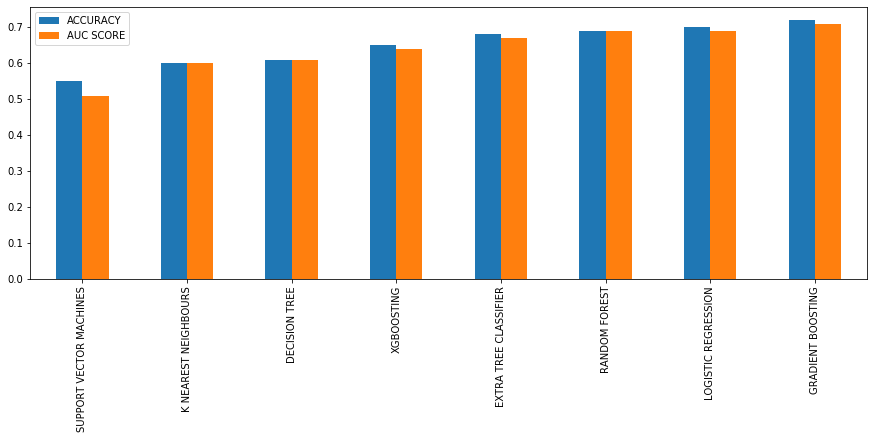

In [94]:
s3.sort_values(by="ACCURACY").plot(kind="bar",figsize=(15,5))


### Final Predections

In [95]:
c=train.drop(["Survived"],axis=1)
d=train["Survived"]

In [96]:
log.fit(c,d)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
rf.fit(c,d)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [98]:
gb.fit(c,d)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=10,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
dt.fit(c,d)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [100]:
xg.fit(c,d)

[18:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [101]:
ex.fit(c,d)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=12, max_features='auto',
                     max_leaf_nodes=20, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [102]:
k.fit(c,d)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [106]:
predict_test_reg=log.predict(test)

In [107]:
l1=pd.DataFrame(predict_test_reg)
l1.columns=["LOGISTIC REGRESSION PREDECTIONS"]
l1.head()

,LOGISTIC REGRESSION PREDECTIONS
0,0
1,0
2,0
3,0
4,1


In [108]:
pred_test_dt= dt.predict(test)

In [109]:
l2=pd.DataFrame(pred_test_dt)
l2.columns=["DECISION TREE PREDECTIONS"]
l2.head()

,DECISION TREE PREDECTIONS
0,0
1,1
2,0
3,0
4,1


In [110]:
pred_test_rf= rf.predict(test)

In [111]:
l3=pd.DataFrame(pred_test_rf)
l3.columns=["RANDOM FOREST PREDECTIONS"]
l3.head()

,RANDOM FOREST PREDECTIONS
0,0
1,0
2,0
3,0
4,0


In [112]:
pred_test_gb= gb.predict(test)

In [113]:
l4=pd.DataFrame(pred_test_gb)
l4.columns=["GRADIENT BOOSTING PREDECTIONS"]
l4.head()

,GRADIENT BOOSTING PREDECTIONS
0,0
1,0
2,0
3,0
4,0


In [115]:
pred_test_xg= xg.predict(test)

In [116]:
l5=pd.DataFrame(pred_test_xg)
l5.columns=["XG BOOSTING PREDECTIONS"]
l5.head()

,XG BOOSTING PREDECTIONS
0,0
1,0
2,0
3,0
4,0


In [117]:
pred_test_ex= ex.predict(test)

In [118]:
l6=pd.DataFrame(pred_test_ex)
l6.columns=["EXTRA TREE CLASSIFIER"]
l6.head()

,EXTRA TREE CLASSIFIER
0,0
1,0
2,0
3,0
4,0


In [119]:
pred_test_k= k.predict(test)

In [120]:
l7=pd.DataFrame(pred_test_ex)
l7.columns=["K NEAREST NEIGHBOURS"]
l7.head()

,K NEAREST NEIGHBOURS
0,0
1,0
2,0
3,0
4,0
